In [ ]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

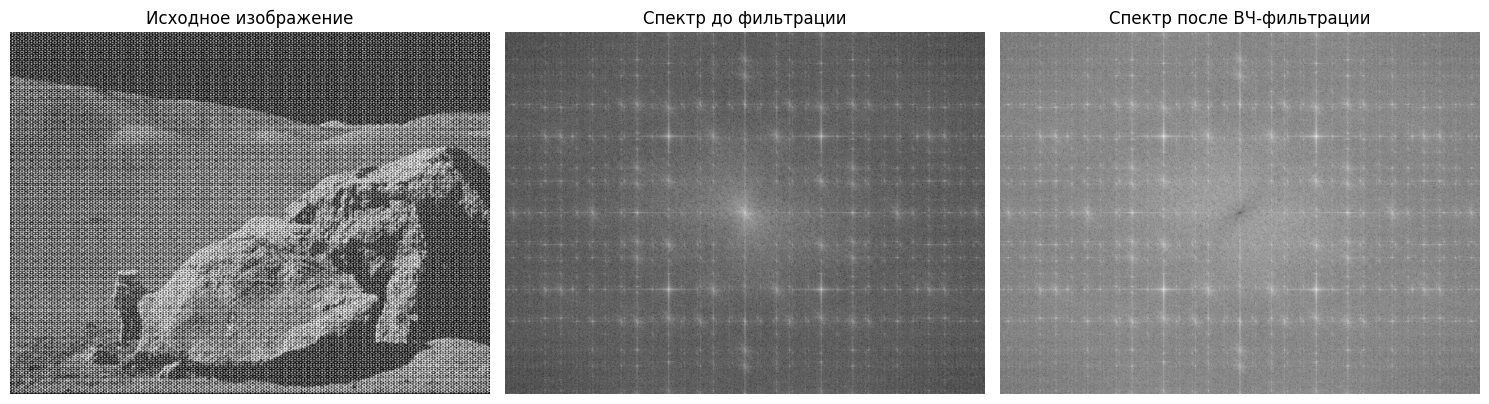

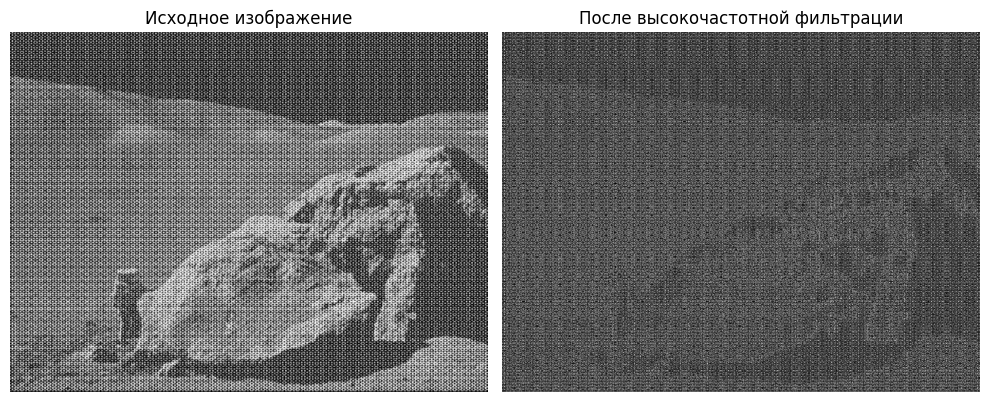

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max


image_path = 'periodic_noise.jpg'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Файл {image_path} не найден.")


rows, cols = image.shape
dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)


magnitude_spectrum_before = 20*np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)


sigma = 30
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
gauss_mask = np.exp(-((x - cols//2)**2 + (y - rows//2)**2)/(2*sigma**2))
high_pass_mask = 1 - gauss_mask
dft_shift_hp = dft_shift * high_pass_mask[:, :, np.newaxis]


magnitude_spectrum_after = 20*np.log(cv.magnitude(dft_shift_hp[:,:,0], dft_shift_hp[:,:,1]) + 1)


f_ishift = np.fft.ifftshift(dft_shift_hp)
img_back_hp = cv.idft(f_ishift)
img_back_hp = cv.magnitude(img_back_hp[:,:,0], img_back_hp[:,:,1])


plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(132)
plt.imshow(magnitude_spectrum_before, cmap='gray')
plt.title("Спектр до фильтрации")
plt.axis('off')

plt.subplot(133)
plt.imshow(magnitude_spectrum_after, cmap='gray')
plt.title("Спектр после ВЧ-фильтрации")
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_back_hp, cmap='gray')
plt.title("После высокочастотной фильтрации")
plt.axis('off')
plt.tight_layout()
plt.show()

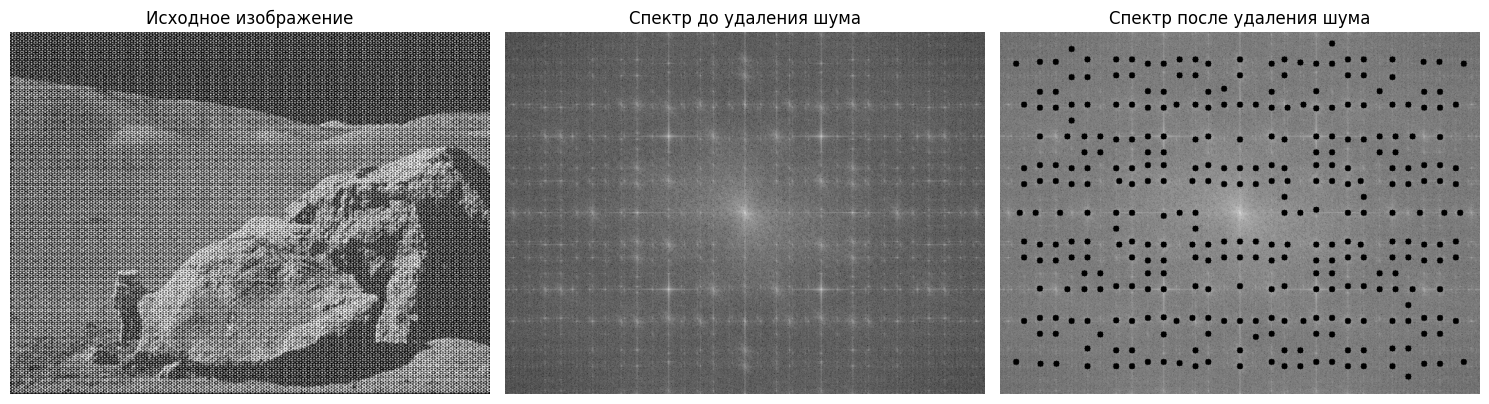

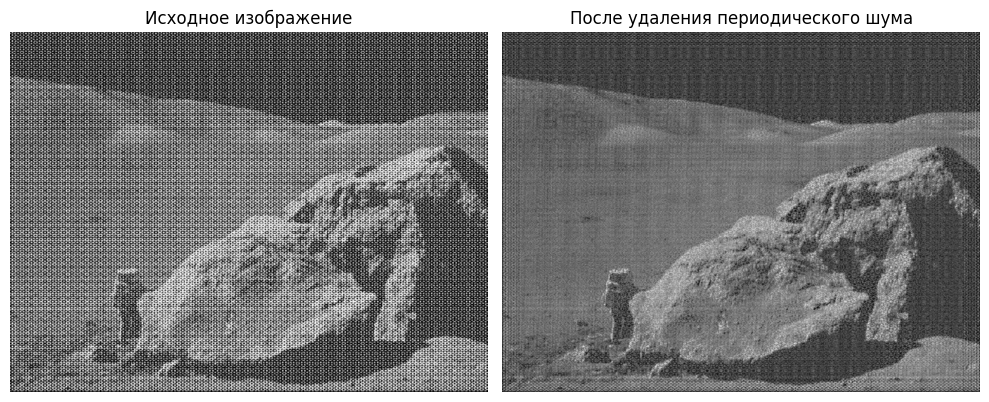

In [2]:
dft2 = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

magnitude_spectrum2 = 20*np.log(cv.magnitude(dft_shift2[:,:,0], dft_shift2[:,:,1]) + 1)


local_maxima = peak_local_max(magnitude_spectrum2, min_distance=20, threshold_abs=180)

mask = np.ones((rows, cols, 2), dtype=np.uint8)
center_x, center_y = rows//2, cols//2
for peak in local_maxima:
    y, x = peak
    distance = np.sqrt((x - center_y)**2 + (y - center_x)**2)
    if distance > 40:  
        cv.circle(mask, (x, y), 5, (0, 0), -1)


dft_shift_filtered_noise = dft_shift2 * mask

magnitude_spectrum_after_noise = 20*np.log(cv.magnitude(dft_shift_filtered_noise[:,:,0],
                                                        dft_shift_filtered_noise[:,:,1]) + 1)


f_ishift2 = np.fft.ifftshift(dft_shift_filtered_noise)
img_back_noise = cv.idft(f_ishift2)
img_back_noise = cv.magnitude(img_back_noise[:,:,0], img_back_noise[:,:,1])


plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(132)
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.title("Спектр до удаления шума")
plt.axis('off')

plt.subplot(133)
plt.imshow(magnitude_spectrum_after_noise, cmap='gray')
plt.title("Спектр после удаления шума")
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_back_noise, cmap='gray')
plt.title("После удаления периодического шума")
plt.axis('off')
plt.tight_layout()
plt.show()
